# Exploratory Data Analyst : Case Mall Customers
---
Analisis menggunakan datasheet Mall Customer untuk menemukan pola konsumen yang paling sering berbelanja berdasarkan jenis kelamin, pendapatan tahunan, skor pengeluaran, kategori usia dan lain-lain 

# 1. Load datasheet from postgresql 
---
pertama kita akan membuat koneksi database ke postgresql pada tabel customer_segmentation untuk datasheet yang akan kita gunakan dalam proses analisis 

In [1]:
import pandas as pd # library untuk pengolohan dataframe 
import numpy as np  # library untuk komputasi numerik 

# import library untuk koneksi ke database postgresql 
from sqlalchemy import create_engine

# menyambungkan ke database postgresql 
# Pastikan Anda mengganti parameter sesuai dengan kredensial PostgreSQL Anda
db_params = {
    'host': 'localhost',
    'dbname': 'DB_ML',
    'user': 'postgres',
    'password': 'admin',
    'port': 5432  # default PostgreSQL port
}

# membuat engine untuk koneksi menggunakan SQL Alchemy 
engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# muat tabel ke dalam dataframe pandas 
df = pd.read_sql_table('customer_segmentation', engine)

# tampilkan isi dari tabel customer segemntation 
print(df.head())

print("""
Dari datasheet tersebut dapat diketahui bahwa kita bisa melakukan analisis 
untuk menemukan insight dengan memanfaatkan kolom annual income dan spending score 
terhadap gender dan kategori usia sehingga hasil akhirnya kita bisa membuat 
analisis customer segmentation dan meningkatkan penjualan.
""")

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  kategori_usia  
0   Dewasa Muda  
1   Dewasa Muda  
2   Dewasa Muda  
3   Dewasa Muda  
4        Dewasa  

Dari datasheet tersebut dapat diketahui bahwa kita bisa melakukan analisis 
untuk menemukan insight dengan memanfaatkan kolom annual income dan spending score 
terhadap gender dan kategori usia sehingga hasil akhirnya kita bisa membuat 
analisis customer segmentation dan meningkatkan penjualan.



## 1.1 Melihat komposisi dari datasheet yang digunakan
--- 
pertama kita akan melihat komposisi dari datasheet yang kita gunakan seperti jumlah baris dan kolom, dan tipe data serta mengecek apakah ada data yang nilai nya mengalami missing value dan lain-lain

In [2]:
print(f'Jumlah baris pada datasheet tersebut berjumlah : {df.shape[0]} baris') # mengecek jumlah baris pada datasheet
print(f'Jumlah kolom pada datasheet tersebut berjumlah : {df.shape[1]} kolom') # mengecek jumlah kolom pada datasheet 

print("""
ternyata jumlah komposisi pada datasheet kita berjumlah 200 baris data dan 6 kolom meskipun
jumlahnya sedikit kita akan memaksimalkan denganmenggunakan metode statistik yang sesuai agar 
memberikan haisl yang optimal 
""")

Jumlah baris pada datasheet tersebut berjumlah : 200 baris
Jumlah kolom pada datasheet tersebut berjumlah : 6 kolom

ternyata jumlah komposisi pada datasheet kita berjumlah 200 baris data dan 6 kolom meskipun
jumlahnya sedikit kita akan memaksimalkan denganmenggunakan metode statistik yang sesuai agar 
memberikan haisl yang optimal 



## 1.2 Mengecek apakah ada data yang bernilai missing value
---
pada bagian ini kita akan melakukan pengecekan untuk mengetahui apakah ada data yang mengalami missing value pada datasheet yang kita gunakan dan menghapus atau mengganti nilai yang missing value tersebut sebelum dilanjutkan ke dalam proses berikut nya 

In [3]:
# mengecek apakah ada data yang mengalami missing value 
print(f'jumlah duplikasi : {df.duplicated().sum()} data')

print("""
ternyata tidak ada data yang mengalami misisng value sehingga kita bisa lanjutkan ke tahap berikutnya 
yaitu analisis outlier untuk mengetahui bahwa apakah ada fitur yang mengalami outliers yang mungkin 
bisa mempengarui kinerja dari model yang kita buat nanti
""")

jumlah duplikasi : 0 data

ternyata tidak ada data yang mengalami misisng value sehingga kita bisa lanjutkan ke tahap berikutnya 
yaitu analisis outlier untuk mengetahui bahwa apakah ada fitur yang mengalami outliers yang mungkin 
bisa mempengarui kinerja dari model yang kita buat nanti



# 2.Exploratory data analyst (EDA)
---
Tahap selanjutnya kita akan masuk kedalam tahap analisis EDA untuk melakukan preprocessing pada data yang meliputi pembersihan pada data dan mencari insight yang mungkin bisa memberikan keuntungan kedepan nya 

## 2.1 Rename columns
---
pada proses ini kita akan melakukan perubahan nama fitur pada kolom datasheet kita agar mudah untuk melakukan analisis kedepannya 

In [4]:
# rename kolom annual income dan spending skor 
df = df.rename(columns={'Annual Income (k$)':'Pendapatan_Tahunan', 'Spending Score (1-100)':'Skor_Pengeluaran'})
print(df.head())

print("""
dengan merubah nama kolom annual income (k$) dan spending score (1-100) kita bisa lebih mudah 
untuk melakukan analisis jika kita menggunakan 2 kolom tersebut nanti nya 
""")

   CustomerID  Gender  Age  Pendapatan_Tahunan  Skor_Pengeluaran kategori_usia
0           1    Male   19                  15                39   Dewasa Muda
1           2    Male   21                  15                81   Dewasa Muda
2           3  Female   20                  16                 6   Dewasa Muda
3           4  Female   23                  16                77   Dewasa Muda
4           5  Female   31                  17                40        Dewasa

dengan merubah nama kolom annual income (k$) dan spending score (1-100) kita bisa lebih mudah 
untuk melakukan analisis jika kita menggunakan 2 kolom tersebut nanti nya 



## 2.2 Analisis data outlier dan visualisasi boxplot
---
selanjutnya kita akan melakukan visulisasi data dengan boxplot untuk melihat penyebaran dari dari fitur data yang kita miliki 

In [5]:
import matplotlib.pyplot as plt # library untuk visualisasi data 
import seaborn as sns           # library untuk visualisasi data 

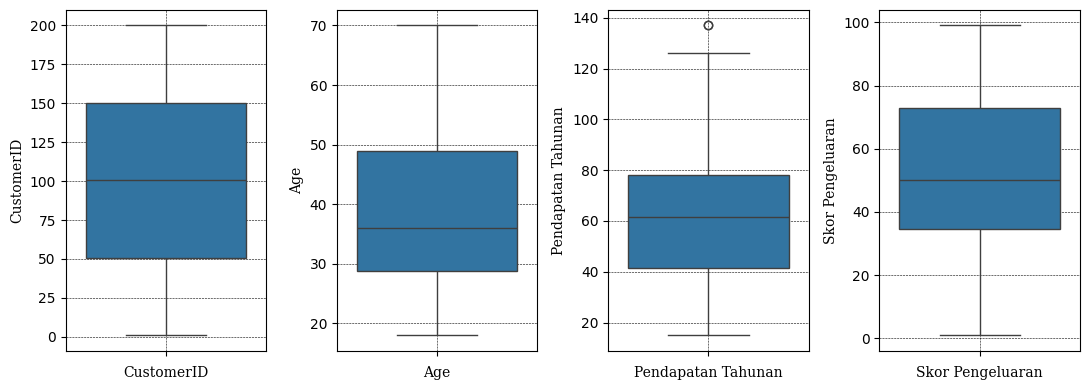


dari hasil analisis berikut ternyata ada satu kolom yang mengalami nilai outlier 
yaitu kolom pendapatan tahunan selanjutnya kita akan mencari tahu berapa jumlah 
data outlier dari kolom pendapatan tahunan sehingga kita bisa menggunakan metode 
statistik yang tepat apakah harus menghapus data atau merubah dengan metdoe tertentu



In [17]:
# Buat visualisasi data dengan boxplot
fig, axs = plt.subplots(1, 4, figsize=(11, 4))

# Fungsi untuk membuat boxplot
def create_boxplot(ax, y, label):
    sns.boxplot(y=y, data=df, ax=ax)
    ax.set_xlabel(label, fontsize=10, fontfamily='serif')
    ax.set_ylabel(label, fontsize=10, fontfamily='serif')
    ax.grid(color='black', linestyle='--', linewidth=0.4)

# Buat grafik visualisasi data
create_boxplot(axs[0], 'CustomerID', 'CustomerID')
create_boxplot(axs[1], 'Age', 'Age')
create_boxplot(axs[2], 'Pendapatan_Tahunan', 'Pendapatan Tahunan')
create_boxplot(axs[3], 'Skor_Pengeluaran', 'Skor Pengeluaran')

plt.tight_layout()
plt.show()

print("""
dari hasil analisis berikut ternyata ada satu kolom yang mengalami nilai outlier 
yaitu kolom pendapatan tahunan selanjutnya kita akan mencari tahu berapa jumlah 
data outlier dari kolom pendapatan tahunan sehingga kita bisa menggunakan metode 
statistik yang tepat apakah harus menghapus data atau merubah dengan metdoe tertentu
""")

### 2.2.1 Menghitung jumlah nilai outlier yang terdeteksi pada semua kolom
---
pada tahap ini kita akan melakukan analisis untuk mengetahui jumlah outlier pada semua kolom fitur yang kita punya dan mencari solusi terbaik untuk menghilangkan outliers tersebut. Karena isi data kita hanya berjumlah 200, dengan data yang sedikit ini kita ingin memaksimalkan informasi yang bisa di dapat dari data tersebut

In [20]:
# buat fungsi untuk menghitung jumlah nilai outlier pada setiap kolom
def detect_outliers(data, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

# print jumlah kolom yang terdeteksi sebagai outlier 
print(detect_outliers(df,'Pendapatan_Tahunan').count() + detect_outliers(df,'Skor_Pengeluaran').count())

print("""
sekarang kita mengetahui bahwa ternyata outliers ada di semua fitur kita dengan jumlah 12 data 
sehingga kita perlu menagani 12 data ini agar tidak mempengaruhi pada saat pembuatan model
""")

CustomerID            2
Gender                2
Age                   2
Pendapatan_Tahunan    2
Skor_Pengeluaran      2
kategori_usia         2
dtype: int64

sekarang kita mengetahui bahwa ternyata outliers ada di semua fitur kita dengan jumlah 12 data 
sehingga kita perlu menagani 12 data ini agar tidak mempengaruhi pada saat pembuatan model



### 2.2.2 Preprocessing dengan teknik winsorize

In [ ]:
# import library yang dibutuhkan untuk preprocessing data dengan teknik winsorize
from scipy.stats.mstats import winsorize
import warnings

# buat variabel untuk menghilangkan error pada saat proses normalisasi data 
warnings.filterwarnings('ignore')

# gunakan kolom pendapatan tahunan dan skor pengeluaran sebagai fitur yang ingin di normalisasi 
df['Pendapatan_Tahunan'] = winsorize(df['Pendapatan_Tahunan'], limits=[0.05, 0.05])
df['Skor_Pengeluaran'] = winsorize(df['Skor_Pengeluaran'], limits=[0.05, 0.05])

# print jumlah kolom yang terdeteksi sebagai outlier 
print(detect_outliers(df,'Pendapatan_Tahunan').count() + detect_outliers(df,'Skor_Pengeluaran').count())

print("""
sekarang kita mengetahui bahwa tidak ada lagi outliers pada semua fitur yang kita punya 
dengan teknik winsorize ini kita dapat melakukann preprocesing pada data tanpa harus 
menghapus data untuk menghilangkan outliers melainkan merubah data tersbeut dengan nilai 
dari persentil tertentu, pada contoh ini kita menggunakan persentil ke 5 untuk normalisasi data
""")

CustomerID            0
Gender                0
Age                   0
Pendapatan_Tahunan    0
Skor_Pengeluaran      0
kategori_usia         0
dtype: int64

sekarang kita mengetahui bahwa tidak ada lagi outliers pada semua fitur yang kita punya 
dengan teknik winsorize ini kita dapat melakukann preprocesing pada data tanpa harus 
menghapus data untuk menghilangkan outliers melainkan merubah data tersbeut dengan nilai 
dari persentil tertentu, pada contoh ini kita menggunakan persentil ke 5 untuk normalisasi data



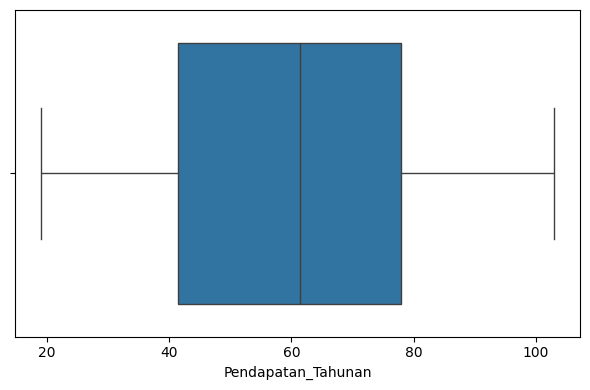


Dari visualisasi berikut dapat diketahui bahwa sekarang tidak ada lagi data yang mengalami outlier 
terutama pada fitur pendapatan tahunan sehingga kita bisa menggunakan data ini untuk analisis lebih lanjut



In [28]:
# mengecek kembali kolom fitur pendapatan setelah dilakukan normalisasi data dengan teknik winsorize
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Pendapatan_Tahunan', data = df)
plt.tight_layout()
plt.show()

print("""
Dari visualisasi berikut dapat diketahui bahwa sekarang tidak ada lagi data yang mengalami outlier 
terutama pada fitur pendapatan tahunan sehingga kita bisa menggunakan data ini untuk analisis lebih lanjut
""")

## 2.3 Analisis distribusi data dan central tedency
---
pada tahap ini melakukan analisis untuk mengetahui distribusi dan central tedency dari data yang kita punya untuk mendapatkan informasi yang mungkin berguna untuk kegiatan memahami pola customer dalam berbelanja berdasarkan usia, jenis kelamin, pendapatan dan skor pengeluaran

In [29]:
# import library untuk distribusi normal dengan scipy dan buat class oop untuk analisis kde 
from scipy.stats import norm

class DataVisualizer:
    def __init__(self, data):
        self.data = data

    def plot_kde_pdf_cdf(self, column_name, x_label="", y_labels=("", ""), title="", figsize=(8, 4)):
        # Calculate mean and standard deviation
        mean = self.data[column_name].mean()
        std = self.data[column_name].std()

        # Calculate PDF and CDF
        pdf = norm.pdf(self.data[column_name], loc=mean, scale=std)
        cdf = norm.cdf(self.data[column_name], loc=mean, scale=std)

        # Create subplots
        fig, axs = plt.subplots(1, 2, figsize=figsize)

        # Plot PDF
        sns.kdeplot(x=self.data[column_name], lw=2, ax=axs[0])
        sns.lineplot(x=self.data[column_name], y=pdf, lw=2, ax=axs[0])
        axs[0].legend(["KDE", f"{column_name}_PDF"], shadow=True, fontsize=9, loc="upper left")
        axs[0].set_ylabel(y_labels[0], fontsize=12)

        # Plot CDF
        sns.kdeplot(x=self.data[column_name], cumulative=True, lw=2, ax=axs[1])
        sns.lineplot(x=self.data[column_name], y=cdf, lw=2, ax=axs[1])
        axs[1].legend(["KDE Cumulative", f"{column_name}_CDF"], shadow=True, fontsize=9)
        axs[1].set_ylabel(y_labels[1], fontsize=12)

        # Set titles and labels
        for ax in axs:
            ax.set_xlabel(x_label, fontsize=12)
            ax.set_title(title, fontsize=10, loc="left")
            ax.grid(axis="y", color='darkgray', linestyle='--', linewidth=0.5)

        # Adjust layout and show plot
        plt.tight_layout()
        plt.show()

### 2.3.1 Analisis distribusi data dan visualisasi untuk kolom pendapatan tahunan 
--- 
pada tahap ini kita akan melakukan pengujian distribusi data untuk fitur pendapatan tahunan

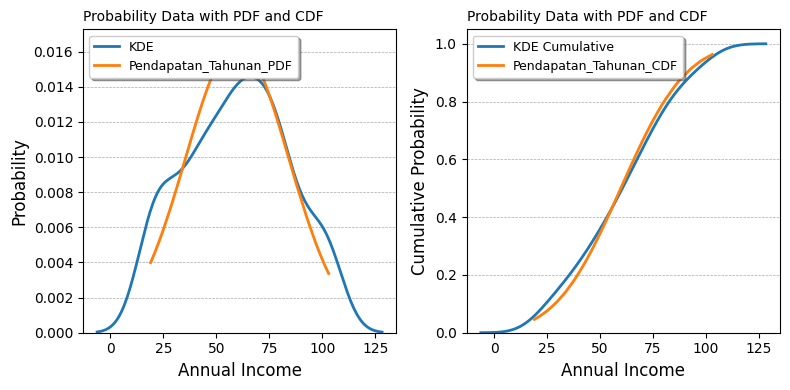


Dari hasil visualisasi tersebut dapat diketahui bahwa 



In [32]:
# panggil class DataVisualizer
visualizer = DataVisualizer(df)
# panggil function plot_kde_pdf_cdf
visualizer.plot_kde_pdf_cdf(
    column_name='Pendapatan_Tahunan', 
    x_label="Annual Income", 
    y_labels=("Probability", "Cumulative Probability"), 
    title="Probability Data with PDF and CDF"
)

print("""
Dari hasil visualisasi tersebut dapat diketahui bahwa 
""")

### 2.3.2 Analisis distribusi data dan visualisasi untuk kolom skor pengeluaran
---
pada tahap uni kita akan melakukan pengujian distribusi data dan analisis untuk skor pengeluaran 

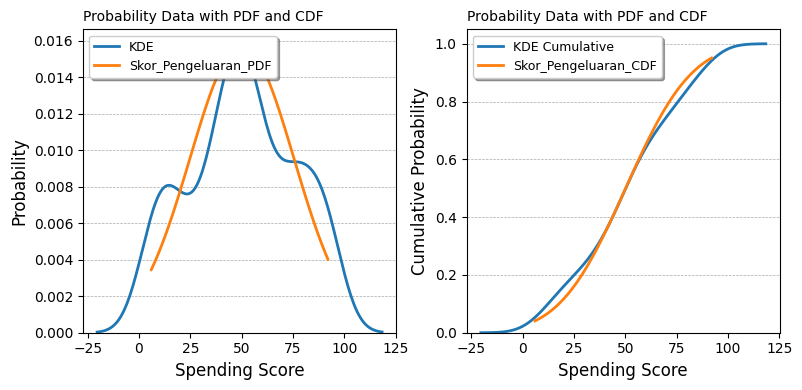


Dari hasil visualisasi tersebut dapat diketahui bahwa 



In [33]:
# panggil class DataVisualizer
visualizer = DataVisualizer(df)
# panggil function plot_kde_pdf_cdf
visualizer.plot_kde_pdf_cdf(
    column_name='Skor_Pengeluaran', 
    x_label="Spending Score", 
    y_labels=("Probability", "Cumulative Probability"), 
    title="Probability Data with PDF and CDF"
)

print("""
Dari hasil visualisasi tersebut dapat diketahui bahwa 
""")

### 2.3.3 Analisis distribusi data dan visualisasi untuk kolom data Age
--- 
Pada tahap ini kita akan melakukan analisis dan pengujian untuk data Age 

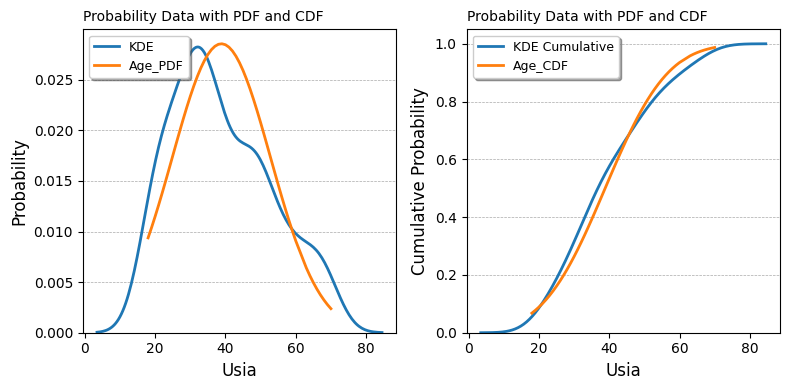


Dari hasil visualisasi tersebut dapat diketahui bahwa 



In [34]:
# panggil class DataVisualizer
visualizer = DataVisualizer(df)
# panggil function plot_kde_pdf_cdf
visualizer.plot_kde_pdf_cdf(
    column_name='Age', 
    x_label="Usia", 
    y_labels=("Probability", "Cumulative Probability"), 
    title="Probability Data with PDF and CDF"
)

print("""
Dari hasil visualisasi tersebut dapat diketahui bahwa 
""")